# Análise de dados referente a taxa de desemprego e fatores socioeconômicos no Brasil entre 2012 e 2024

## 🔹 1° Etapa: carregamento e tratamento dos dados com auxílio da biblioteca Pandas

Os seguintes arquivos serão carregados e tratados:
- Taxa de desemprego (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego geral ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - ensino fundamental completo ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas com ensino fundamental completo ou equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - ensino fundamental incompleto ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas com ensino fundamental incompleto ou equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - ensino médio completo ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas com ensino médio completo ou equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - ensino médio incompleto ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas com ensino médio incompleto ou equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - ensino superior completo ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas com ensino superior completo ou equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - ensino superior incompleto ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas com ensino superior incompleto ou equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.
- Taxa de desemprego - sem instrução ou equivalente (IBGEPnad Contínua).csv: apresenta dados sobre a taxa de desemprego para pessoas sem instrução equivalente ao longo dos trimestres de 2012 a 2024 por região do Brasil.

In [1]:
import pandas as pd
from IPython.display import display

# configurar panda para mostrar todas as colunas
pd.set_option('display.max_columns', None)

def obter_mapeamento_arquivos():
    mapeamento_arquivos = {
        'desemprego_geral': 'data/Taxa de desemprego (IBGEPnad Contínua).csv',
        'desemprego_fundamental_completo': 'data/Taxa de desemprego - ensino fundamental completo ou equivalente (IBGEPnad Contínua).csv',
        'desemprego_fundamental_incompleto': 'data/Taxa de desemprego - ensino fundamental incompleto ou equivalente (IBGEPnad Contínua).csv',
        'desemprego_medio_completo': 'data/Taxa de desemprego - ensino médio completo ou equivalente (IBGEPnad Contínua).csv',
        'desemprego_medio_incompleto': 'data/Taxa de desemprego - ensino médio incompleto ou equivalente (IBGEPnad Contínua).csv',
        'desemprego_superior_completo': 'data/Taxa de desemprego - ensino superior completo ou equivalente (IBGEPnad Contínua).csv',
        'desemprego_superior_incompleto': 'data/Taxa de desemprego - ensino superior incompleto ou equivalente (IBGEPnad Contínua).csv',
        'desemprego_sem_instrucao': 'data/Taxa de desemprego - sem instrução ou equivalente (IBGEPnad Contínua).csv'
    }
    return mapeamento_arquivos

def obter_mapeamento_trimestres_extenso():
    mapeamento_trimestres = {
        'T1': '1° Trimestre',
        'T2': '2° Trimestre',
        'T3': '3° Trimestre',
        'T4': '4° Trimestre'
    }
    return mapeamento_trimestres

def limpar_colunas_numericas(data_frame):
    # Selecionar colunas numéricas suspeitas (as que não são 'Sigla', 'Região', etc.)
    colunas = data_frame.columns
    colunas_a_converter = [col for col in colunas if any(str(ano) in col for ano in range(2012, 2025))]

    for coluna in colunas_a_converter:
        data_frame[coluna] = pd.to_numeric(data_frame[coluna], errors='coerce')  # 'coerce' transforma erro em NaN

    return data_frame

def ler_tratar_arquivos(arquivos):
    # Inicializar dicionário para armazenar DataFrames
    conjunto_dados_arquivos = {}

    # Loop para ler e tratar os arquivos
    for chave, caminho_arquivo in arquivos.items():
        novo_data_frame = pd.read_csv(caminho_arquivo, skiprows=1)
        
        # Remove colunas 'Unnamed', geradas por conta da primeira linha em cada CSV
        novo_data_frame = novo_data_frame.loc[:, ~novo_data_frame.columns.str.contains('^Unnamed')]
    
        # Corrigir nomes dos trimestres
        for trimestre_antigo, trimestre_novo in obter_mapeamento_trimestres_extenso().items():
            novo_data_frame.columns = novo_data_frame.columns.str.replace(trimestre_antigo, trimestre_novo)
    
        novo_data_frame = limpar_colunas_numericas(novo_data_frame)
        
        # Salvar no dicionário
        conjunto_dados_arquivos[chave] = novo_data_frame
    
    return conjunto_dados_arquivos

def imprimir_conjunto_dados(conjunto_dados):
    # Mostrar todos os DataFrames
    for chave, novo_data_frame in conjunto_dados.items():
        print(f'▶️ Dados: {chave}')
        display(novo_data_frame.head())
        
conjunto_dados_tratados = ler_tratar_arquivos(obter_mapeamento_arquivos())
imprimir_conjunto_dados(conjunto_dados_tratados)


▶️ Dados: desemprego_geral


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2020 2° Trimestre,2020 3° Trimestre,2020 4° Trimestre,2021 1° Trimestre,2021 2° Trimestre,2021 3° Trimestre,2021 4° Trimestre,2022 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,7.1,6.3,5.7,5.8,6.8,6.0,5.6,4.9,5.9,5.6,5.5,5.4,7.4,7.5,7.7,7.5,9.8,9.8,10.1,11.0,12.2,10.7,9.7,9.4,10.6,9.5,9.0,8.5,10.9,10.4,10.2,9.5,10.7,12.7,12.9,12.1,12.8,11.6,9.8,8.4,8.5,7.0,6.5,6.2,7.0,5.7,5.5,5.8,6.1,5.4,4.9,5.0
1,N,1,Região Norte,9.0,8.3,7.9,7.4,8.7,8.4,7.6,6.6,7.9,7.4,7.0,6.9,8.8,8.7,9.0,8.8,10.7,11.4,11.6,12.9,14.4,12.6,12.4,11.4,12.9,12.2,11.7,11.8,13.2,12.0,11.9,10.7,12.1,12.0,13.3,12.6,15.0,14.1,12.0,11.2,11.7,8.9,8.2,8.1,9.1,8.1,7.7,7.7,8.2,6.9,6.6,6.9
2,NE,2,Região Nordeste,9.8,9.7,9.4,9.4,11.1,10.1,9.1,8.0,9.4,8.9,8.7,8.3,9.7,10.4,10.9,10.6,13.0,13.4,14.3,14.5,16.4,16.0,15.0,14.0,16.0,15.0,14.6,14.5,15.4,14.8,14.6,13.8,15.8,16.5,18.3,17.6,18.9,18.4,16.4,14.7,14.9,12.7,12.0,10.9,12.2,11.3,10.8,10.4,11.1,9.4,8.7,8.6
3,S,4,Região Sul,5.2,4.9,4.3,4.0,4.8,4.3,4.2,3.9,4.4,4.2,4.3,3.8,5.2,5.6,6.1,5.8,7.5,8.2,8.0,7.8,9.4,8.5,8.0,7.7,8.5,8.2,7.9,7.4,8.2,8.1,8.2,6.8,7.7,9.1,9.6,8.4,8.7,8.2,7.5,6.7,6.5,5.6,5.2,4.5,5.0,4.7,4.6,4.5,4.9,4.7,4.1,3.6
4,SE,3,Região Sudeste,8.0,7.5,6.9,6.7,7.7,7.3,7.1,6.3,7.1,7.0,7.0,6.7,8.1,8.4,9.2,9.7,11.6,11.8,12.4,12.5,14.3,13.7,13.3,12.7,13.9,13.3,12.6,12.3,13.3,12.5,12.0,11.5,12.5,14.2,15.7,15.1,15.3,14.6,13.1,11.2,11.1,9.3,8.7,7.9,8.6,7.9,7.5,7.1,7.6,6.6,6.2,5.9


▶️ Dados: desemprego_fundamental_completo


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,8.7,7.4,6.0,5.7,7.8,7.1,5.6,6.0,6.7,7.2,6.7,6.5,8.3,9.4,9.8,8.9,10.4,11.0,12.3,13.7,12.9,12.7,11.5,11.2,13.9,12.3,10.5,11.6,13.0,13.8,13.2,12.1,12.5,9.5,7.6,7.5,8.2,7.2,8.2,7.6,7.1,7.5,7.7,7.1
1,N,1,Região Norte,8.7,9.2,8.1,7.7,8.7,9.4,8.3,7.4,8.3,8.3,8.1,6.6,10.0,10.5,8.9,9.6,13.3,12.8,15.1,14.5,15.8,14.4,15.1,12.2,14.3,11.9,13.5,11.8,12.6,13.5,11.7,10.5,13.2,9.0,10.2,8.3,9.4,8.2,8.4,9.1,8.4,7.7,5.7,7.2
2,NE,2,Região Nordeste,10.5,10.6,11.0,11.0,10.4,12.0,9.9,8.7,10.4,10.0,9.0,9.2,10.1,11.7,11.2,11.8,13.8,15.9,15.9,16.2,17.7,18.2,17.6,15.5,17.3,16.0,15.7,17.4,17.2,16.4,17.6,15.0,18.3,13.3,13.3,13.4,13.4,13.9,13.7,12.3,12.3,11.0,9.5,9.7
3,S,4,Região Sul,6.2,6.1,4.8,4.6,5.0,4.9,4.6,4.6,5.7,5.0,4.7,4.6,6.1,6.8,8.1,7.1,8.7,10.6,10.9,9.7,12.1,10.8,10.2,10.4,9.4,10.2,9.9,9.3,9.8,10.5,11.0,9.5,9.6,6.7,7.6,6.0,7.0,6.2,6.2,6.3,6.8,6.6,6.2,4.4
4,SE,3,Região Sudeste,8.9,8.2,7.6,7.5,8.7,7.9,8.0,6.5,7.6,7.6,8.1,7.3,8.4,8.8,10.1,10.3,12.3,13.2,13.5,13.7,16.0,16.3,16.2,15.1,16.8,15.2,15.2,14.8,15.1,14.7,14.1,13.2,14.3,11.2,10.1,9.2,10.5,9.8,10.2,9.4,9.2,7.8,8.6,7.8


▶️ Dados: desemprego_fundamental_incompleto


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,5.9,5.1,4.7,5.3,6.0,5.2,5.0,4.4,5.4,4.5,4.8,5.0,6.9,6.1,7.3,6.8,8.5,9.2,10.0,11.2,12.6,11.1,10.4,9.7,10.2,9.1,8.3,8.0,10.1,10.0,10.3,8.7,10.0,6.7,6.7,6.0,7.1,4.8,5.5,6.4,5.7,6.0,5.2,5.2
1,N,1,Região Norte,7.1,5.9,5.7,5.3,5.7,6.1,5.8,4.7,5.9,5.5,5.1,5.2,6.4,6.3,6.3,5.8,7.3,8.0,8.0,9.9,10.8,9.2,9.1,8.8,9.8,9.1,9.3,8.4,8.8,8.2,8.7,7.8,8.5,6.1,5.5,6.0,6.4,6.0,5.9,6.7,6.3,5.0,5.4,5.6
2,NE,2,Região Nordeste,8.6,8.6,8.6,8.4,9.8,9.0,8.1,7.0,7.9,8.1,7.8,7.3,8.2,9.3,10.2,9.5,11.3,12.0,13.8,14.1,15.3,15.8,14.5,13.7,15.5,14.7,14.2,14.5,14.7,14.4,14.8,13.6,15.0,11.9,11.9,11.2,11.9,11.7,10.9,10.6,10.2,9.1,7.9,8.6
3,S,4,Região Sul,4.5,4.4,4.1,3.7,4.2,3.9,3.5,3.6,3.7,3.7,3.7,3.9,4.5,5.1,5.7,5.8,6.4,7.2,7.5,8.0,10.0,9.2,7.8,7.8,8.5,8.4,8.4,8.6,8.0,8.4,9.6,7.4,8.2,6.2,5.6,5.0,4.7,4.3,4.4,4.5,4.9,4.7,4.1,4.2
4,SE,3,Região Sudeste,6.8,6.5,6.0,6.1,6.5,6.3,5.6,5.6,6.4,6.0,6.0,6.2,6.8,7.5,8.6,9.3,9.9,10.7,11.3,12.0,12.7,12.5,12.7,12.1,13.0,12.6,11.4,11.7,12.0,11.4,11.2,11.1,11.6,9.2,9.0,9.0,8.8,7.7,7.6,7.9,7.9,6.7,6.1,6.2


▶️ Dados: desemprego_medio_completo


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,8.0,6.8,6.3,6.1,6.9,6.1,5.7,5.2,6.3,5.9,5.8,5.2,7.5,8.0,7.2,7.6,11.3,10.3,10.2,10.8,12.6,10.2,9.7,9.6,10.9,10.2,9.0,8.8,11.8,11.4,10.5,9.7,11.3,7.4,6.7,6.3,6.8,6.4,5.9,5.9,6.4,5.0,4.7,5.0
1,N,1,Região Norte,11.6,10.8,10.7,9.9,11.8,10.7,9.6,8.3,10.1,9.4,8.8,8.9,11.0,10.9,11.4,11.3,12.9,14.5,13.8,15.3,17.9,15.9,14.9,14.2,15.6,15.0,13.6,14.3,16.6,14.5,14.4,13.4,14.8,10.9,10.2,9.6,11.4,10.2,9.4,8.6,10.0,8.1,7.7,8.1
2,NE,2,Região Nordeste,12.5,12.4,11.2,11.0,13.4,12.1,11.0,9.6,11.7,10.6,10.4,9.8,12.0,12.6,13.0,12.7,15.4,15.7,16.1,16.1,18.6,18.0,17.0,15.4,18.2,17.3,16.1,15.7,17.6,16.6,15.9,15.1,17.9,14.8,13.3,11.7,14.4,12.9,11.9,11.6,13.2,11.2,9.9,9.7
3,S,4,Região Sul,5.1,4.8,4.5,4.0,5.4,4.8,4.3,3.8,4.7,4.3,4.8,3.6,5.5,6.2,6.2,5.5,7.9,8.3,8.1,7.6,9.2,7.9,7.9,7.4,8.7,8.4,8.3,7.0,8.4,7.9,7.4,6.5,7.7,5.6,5.2,4.3,5.2,4.8,4.7,4.3,4.5,4.4,3.9,3.2
4,SE,3,Região Sudeste,9.3,8.6,8.1,7.5,8.7,8.3,8.3,7.3,7.9,7.9,7.8,7.6,9.4,9.8,10.2,10.5,13.0,12.9,13.6,13.7,16.0,15.2,14.6,13.7,15.4,14.4,13.9,13.5,14.9,14.0,13.3,12.7,14.5,10.5,9.6,8.4,9.4,9.1,8.4,7.7,8.2,7.7,6.9,6.4


▶️ Dados: desemprego_medio_incompleto


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,10.3,10.6,9.0,8.7,10.6,10.1,8.8,6.4,10.2,9.2,8.2,9.9,12.2,12.2,11.8,13.1,15.1,17.5,16.9,18.0,19.1,19.4,15.2,15.3,16.8,14.8,15.5,14.5,17.9,16.1,16.7,15.9,17.8,12.5,11.8,11.0,11.6,8.5,9.5,9.1,10.5,8.9,8.0,8.0
1,N,1,Região Norte,15.5,14.2,13.7,12.2,15.2,14.1,12.0,11.6,12.0,11.0,10.8,11.6,14.4,12.5,14.8,15.3,18.1,18.0,19.8,22.1,20.4,19.2,19.8,17.8,18.4,18.6,17.1,18.0,19.7,17.7,18.9,16.2,17.4,12.6,11.4,13.2,13.5,10.5,11.8,12.5,12.3,10.5,10.1,10.4
2,NE,2,Região Nordeste,15.6,14.5,15.3,14.9,17.5,15.0,14.3,13.5,13.8,13.7,14.1,13.8,15.2,15.5,16.2,15.3,20.1,20.1,22.3,22.3,25.0,22.4,21.3,21.2,23.9,21.9,22.8,22.3,23.6,22.2,23.3,20.7,23.2,18.7,19.6,17.1,18.0,17.0,17.0,16.9,17.6,13.5,13.8,12.8
3,S,4,Região Sul,9.5,8.9,8.0,7.6,9.2,7.2,7.9,6.8,8.3,8.3,8.0,6.7,9.8,10.1,11.3,10.6,14.9,15.3,14.4,14.2,15.5,15.3,15.4,15.4,15.8,15.5,14.0,12.8,15.6,16.2,14.5,12.6,13.2,10.1,9.8,8.1,9.4,9.5,9.6,9.4,10.4,9.6,8.3,7.7
4,SE,3,Região Sudeste,13.9,13.3,12.6,12.2,13.5,13.5,13.4,11.1,13.1,13.6,12.7,12.2,15.2,14.9,17.1,18.7,22.5,22.6,23.6,23.8,27.9,24.1,23.6,22.8,24.6,24.1,23.8,21.8,24.6,21.9,22.2,20.2,22.5,16.6,16.5,15.2,17.0,15.2,14.3,13.3,14.3,12.0,10.9,10.3


▶️ Dados: desemprego_superior_completo


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,4.9,4.6,4.4,3.7,4.9,4.3,4.0,3.7,4.0,3.7,3.6,3.4,4.6,4.4,4.7,4.6,5.7,6.2,5.2,5.7,7.1,5.5,5.1,5.1,6.2,5.2,5.3,5.0,6.8,5.2,5.8,5.7,6.3,3.7,3.3,3.8,4.6,3.6,2.7,3.4,3.6,3.5,2.7,2.9
1,N,1,Região Norte,4.8,4.9,4.9,4.3,5.2,4.8,4.6,4.3,4.8,4.4,4.4,3.8,5.8,5.2,5.6,5.0,6.5,6.3,6.0,6.3,9.6,7.8,7.4,6.8,7.7,7.8,7.5,7.7,9.2,7.9,8.0,7.0,8.3,6.0,5.1,4.3,5.3,4.6,4.4,4.7,4.6,4.8,4.4,4.0
2,NE,2,Região Nordeste,5.0,4.7,4.5,4.8,6.1,5.4,4.7,4.2,5.4,4.1,4.5,4.9,5.8,4.9,6.1,5.5,6.7,6.5,6.5,7.0,8.6,7.0,6.6,6.9,7.8,7.0,6.7,6.8,7.5,6.9,6.7,7.0,7.8,6.3,5.8,5.1,5.5,5.2,5.1,4.8,5.3,4.7,4.4,4.3
3,S,4,Região Sul,3.3,2.9,2.3,2.3,2.7,2.4,2.6,2.3,2.4,2.3,2.1,2.0,3.0,2.5,3.0,3.1,4.0,3.9,3.7,3.5,4.5,4.1,3.8,3.7,4.5,3.9,3.6,3.5,4.1,3.7,4.0,3.3,3.9,2.8,2.2,2.4,2.6,2.4,2.3,2.3,2.6,2.6,2.1,2.2
4,SE,3,Região Sudeste,4.2,3.6,3.3,3.2,4.4,4.0,3.6,3.3,4.2,3.5,3.7,3.4,4.7,4.2,4.9,5.2,6.3,6.5,6.2,6.0,7.1,6.9,6.3,6.9,6.7,6.8,6.2,6.2,7.2,6.3,5.9,5.7,6.3,4.8,4.2,4.0,4.6,3.8,3.3,3.5,4.1,3.5,3.1,3.2


▶️ Dados: desemprego_superior_incompleto


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,7.4,6.9,6.4,8.0,9.1,8.0,7.3,5.2,6.4,6.5,6.4,6.3,9.4,10.1,10.7,8.5,11.9,9.1,13.0,13.0,14.5,12.1,12.1,10.5,13.0,10.9,11.5,9.1,11.7,11.9,11.2,11.7,13.3,7.3,6.9,7.1,9.7,7.8,6.3,6.6,8.6,7.0,6.7,6.0
1,N,1,Região Norte,10.3,8.7,8.4,9.0,11.3,10.2,9.8,6.9,9.3,9.3,8.3,9.0,10.7,12.7,12.3,13.2,15.9,16.6,18.3,18.5,17.7,14.3,15.0,13.4,18.2,17.6,16.3,17.5,18.8,17.7,15.0,13.3,15.8,12.5,11.0,12.3,12.1,11.9,9.9,8.7,10.2,8.3,8.3,7.8
2,NE,2,Região Nordeste,10.5,9.9,9.4,10.1,12.5,10.9,9.0,8.3,11.8,10.0,9.7,9.2,11.1,11.1,11.4,13.1,16.1,15.0,15.1,16.1,19.1,16.4,15.7,14.7,17.4,16.9,17.2,16.2,16.6,17.2,14.3,15.7,18.2,13.6,11.6,11.3,12.9,10.1,12.2,10.9,11.1,8.8,10.7,8.8
3,S,4,Região Sul,6.3,4.9,4.5,4.1,5.0,4.6,5.7,4.4,4.8,4.9,5.3,4.0,6.2,5.6,5.7,7.0,9.0,9.7,9.0,8.7,9.9,8.5,8.0,7.5,8.8,8.2,7.3,6.9,9.4,7.9,8.8,6.8,9.0,5.9,4.8,4.8,5.1,4.6,5.1,4.7,6.3,5.0,4.3,3.9
4,SE,3,Região Sudeste,7.8,8.4,7.5,6.8,7.9,7.3,7.9,6.9,7.1,8.0,7.5,6.7,8.9,10.0,10.8,10.7,13.4,13.7,15.6,13.5,16.7,15.3,14.4,13.4,16.0,15.4,13.3,12.9,14.2,14.6,14.0,13.1,13.4,10.0,9.8,8.3,8.6,8.6,8.1,7.3,9.0,6.9,6.8,6.7


▶️ Dados: desemprego_sem_instrucao


,Sigla,Código,Região,2012 1° Trimestre,2012 2° Trimestre,2012 3° Trimestre,2012 4° Trimestre,2013 1° Trimestre,2013 2° Trimestre,2013 3° Trimestre,2013 4° Trimestre,2014 1° Trimestre,2014 2° Trimestre,2014 3° Trimestre,2014 4° Trimestre,2015 1° Trimestre,2015 2° Trimestre,2015 3° Trimestre,2015 4° Trimestre,2016 1° Trimestre,2016 2° Trimestre,2016 3° Trimestre,2016 4° Trimestre,2017 1° Trimestre,2017 2° Trimestre,2017 3° Trimestre,2017 4° Trimestre,2018 1° Trimestre,2018 2° Trimestre,2018 3° Trimestre,2018 4° Trimestre,2019 1° Trimestre,2019 2° Trimestre,2019 3° Trimestre,2019 4° Trimestre,2020 1° Trimestre,2022 2° Trimestre,2022 3° Trimestre,2022 4° Trimestre,2023 1° Trimestre,2023 2° Trimestre,2023 3° Trimestre,2023 4° Trimestre,2024 1° Trimestre,2024 2° Trimestre,2024 3° Trimestre,2024 4° Trimestre
0,CO,5,Região Centro-oeste,5.7,4.0,5.3,4.5,5.0,4.6,4.7,3.9,3.4,4.0,3.4,3.1,4.3,4.5,5.1,7.1,9.8,8.5,7.8,11.8,10.7,11.6,7.1,8.3,7.6,9.2,9.8,5.9,9.6,7.4,6.8,8.8,10.4,4.5,7.6,4.5,4.3,4.3,1.8,4.0,4.2,3.7,4.7,5.6
1,N,1,Região Norte,3.5,3.4,1.8,2.5,3.2,3.9,2.8,2.6,3.6,2.2,3.3,2.0,2.4,3.0,5.1,3.0,4.2,5.1,6.2,7.1,6.4,5.9,5.7,5.2,7.3,5.9,5.7,6.6,5.2,6.7,6.9,4.3,5.2,5.2,5.9,5.7,5.1,5.3,3.5,4.3,4.1,3.3,3.8,5.2
2,NE,2,Região Nordeste,4.6,5.1,5.4,5.9,7.2,5.5,5.1,4.1,4.4,4.4,4.7,4.2,4.6,6.3,6.0,6.0,7.8,8.2,8.4,9.2,10.4,11.5,10.5,10.4,11.3,9.1,11.0,10.7,10.9,10.0,9.7,10.0,11.1,9.2,8.7,8.0,8.4,7.5,7.4,6.7,6.8,6.5,6.3,6.9
3,S,4,Região Sul,2.8,5.6,4.1,3.3,4.4,3.1,3.1,3.4,3.5,2.8,3.4,4.2,3.7,5.9,5.1,6.6,4.5,8.6,6.3,11.8,7.8,6.9,6.4,6.8,12.1,6.7,8.0,7.6,9.8,6.6,8.0,6.9,5.4,5.1,5.5,2.2,4.5,4.3,4.2,5.8,6.3,6.3,5.7,4.1
4,SE,3,Região Sudeste,5.7,4.5,4.4,4.3,5.7,5.7,4.6,4.0,3.8,3.3,4.7,4.9,4.6,5.3,5.3,7.1,10.9,9.6,8.0,9.6,10.9,10.1,9.8,9.0,11.4,13.0,11.5,11.9,12.4,8.4,8.0,9.8,10.7,7.4,7.9,8.4,5.8,5.6,7.6,6.5,6.9,5.1,6.0,5.5


## 🔹 2° Etapa: análise descritiva dos dados
- Apresentação de cálculos da média, mediana, moda, desvio padrão, mínimo e máximo.
- Apresentação de gráficos com os dados analisados: histograma, boxplot, gráfico de barras.


📊 Estatísticas gerais para: desemprego_geral (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,8.203846,7.60,9.8,2.427373,4.9,12.9
1,Região Nordeste,12.661538,12.45,9.4,3.060126,8.0,18.9
2,Região Norte,10.050000,9.05,6.9,2.385043,6.6,15.0
3,Região Sudeste,10.201923,9.50,7.1,2.994471,5.9,15.7
4,Região Sul,6.292308,5.95,8.2,1.823791,3.6,9.6


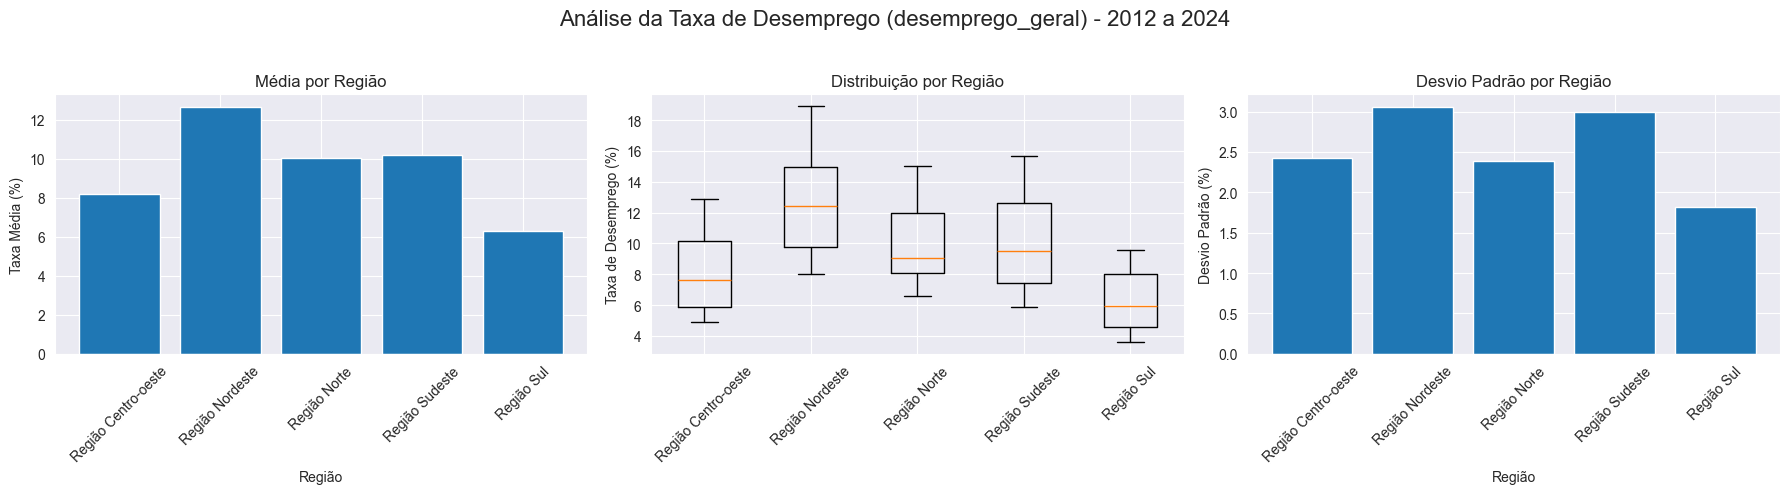


📊 Estatísticas gerais para: desemprego_fundamental_completo (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,9.354545,8.5,7.1,2.585600,5.6,13.9
1,Região Nordeste,13.295455,13.3,11.0,2.987412,8.7,18.3
2,Região Norte,10.354545,9.4,8.3,2.658331,5.7,15.8
3,Região Sudeste,11.022727,10.1,7.6,3.173206,6.5,16.8
4,Região Sul,7.534091,6.8,4.6,2.304994,4.4,12.1


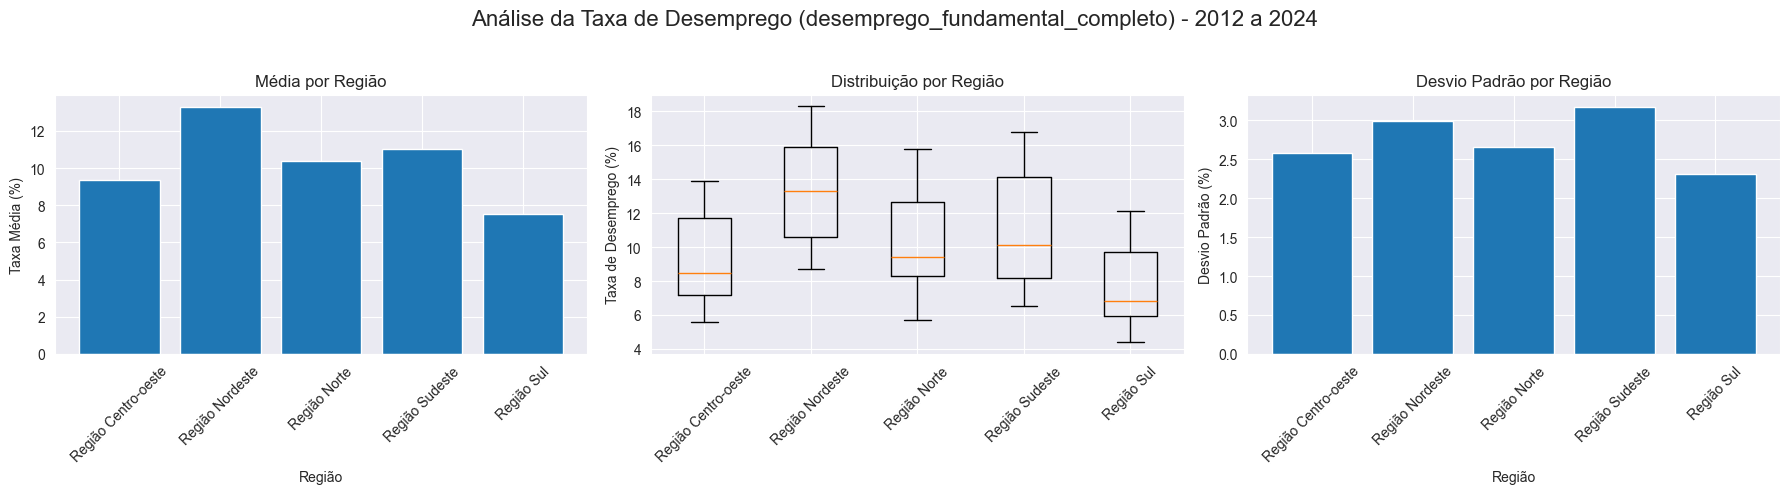


📊 Estatísticas gerais para: desemprego_fundamental_incompleto (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,7.297727,6.70,5.2,2.261867,4.4,12.6
1,Região Nordeste,11.231818,11.05,8.6,2.763279,7.0,15.8
2,Região Norte,6.986364,6.30,5.9,1.608349,4.7,10.8
3,Região Sudeste,8.913636,8.70,6.0,2.517251,5.6,13.0
4,Região Sul,5.909091,5.05,3.7,1.996720,3.5,10.0


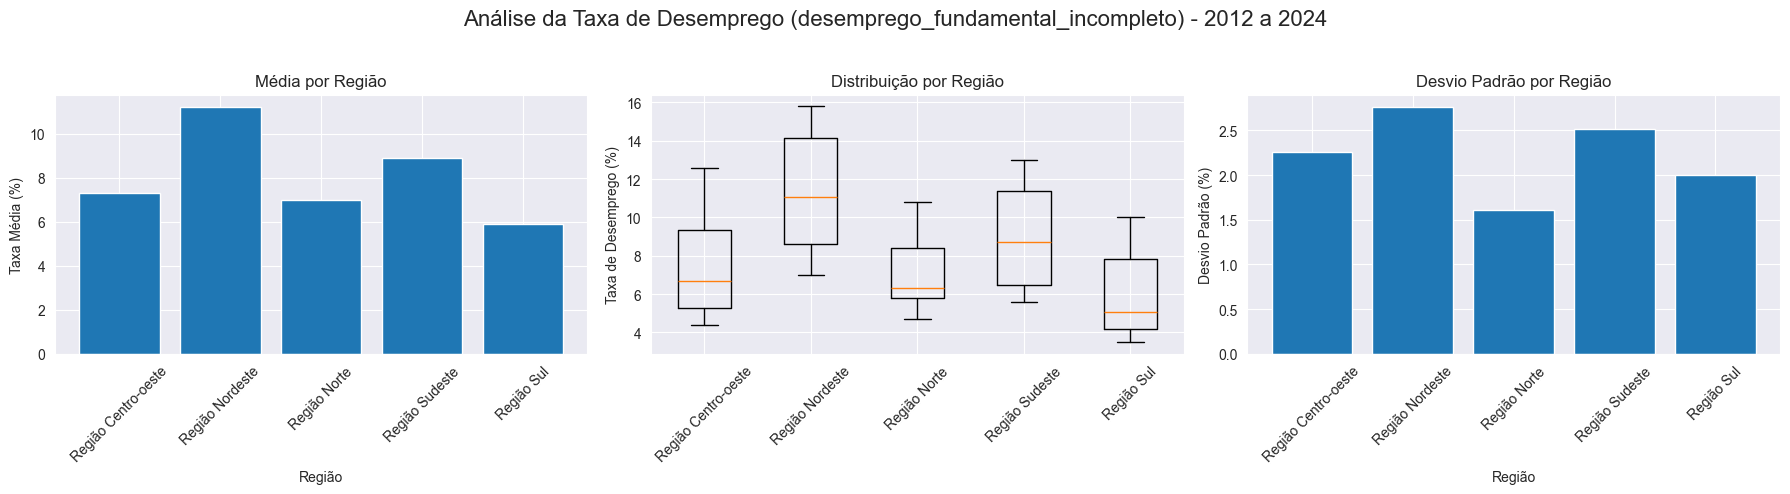


📊 Estatísticas gerais para: desemprego_medio_completo (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,7.940909,7.30,5.9,2.247512,4.7,12.6
1,Região Nordeste,13.711364,13.10,16.1,2.665561,9.6,18.6
2,Região Norte,11.840909,11.15,8.1,2.655956,7.7,17.9
3,Região Sudeste,10.654545,9.50,7.7,2.924591,6.4,16.0
4,Região Sul,5.959091,5.45,4.3,1.717396,3.2,9.2


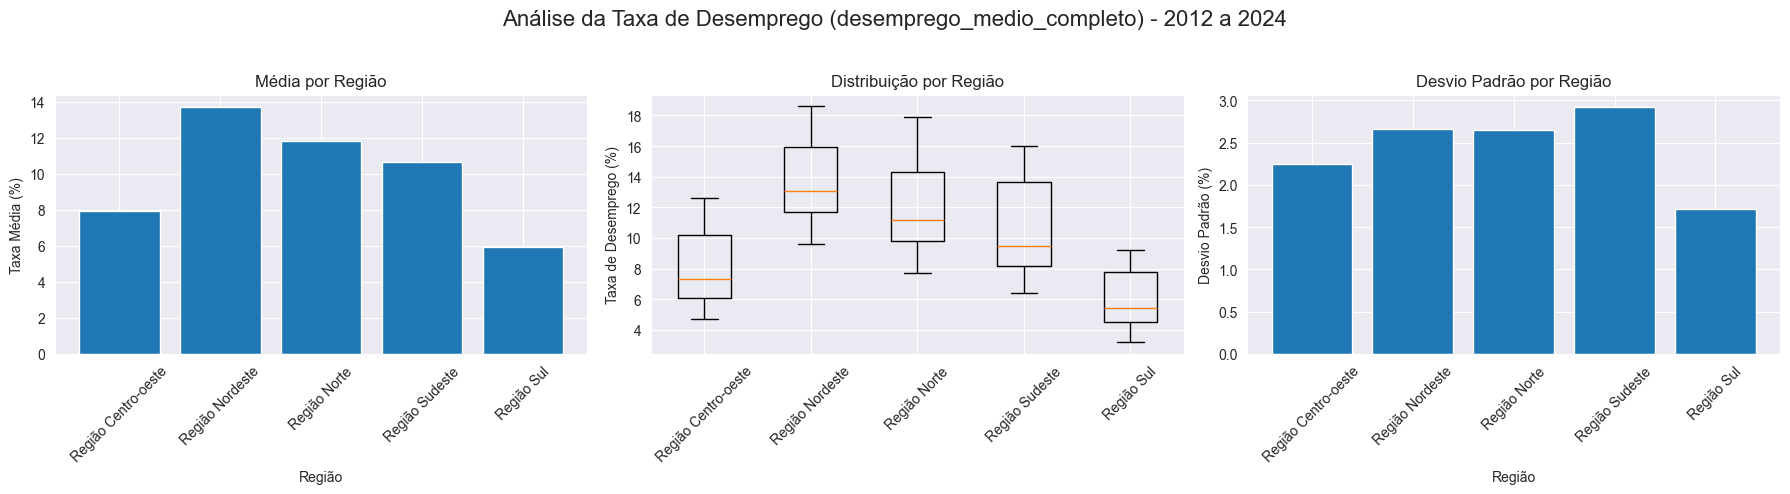


📊 Estatísticas gerais para: desemprego_medio_incompleto (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,12.572727,11.80,8.0,3.605768,6.4,19.4
1,Região Nordeste,18.154545,17.30,13.8,3.676035,12.8,25.0
2,Região Norte,14.929545,14.30,10.5,3.360757,10.1,22.1
3,Região Sudeste,17.572727,15.85,15.2,4.986557,10.3,27.9
4,Região Sul,11.152273,9.95,8.3,3.097372,6.7,16.2


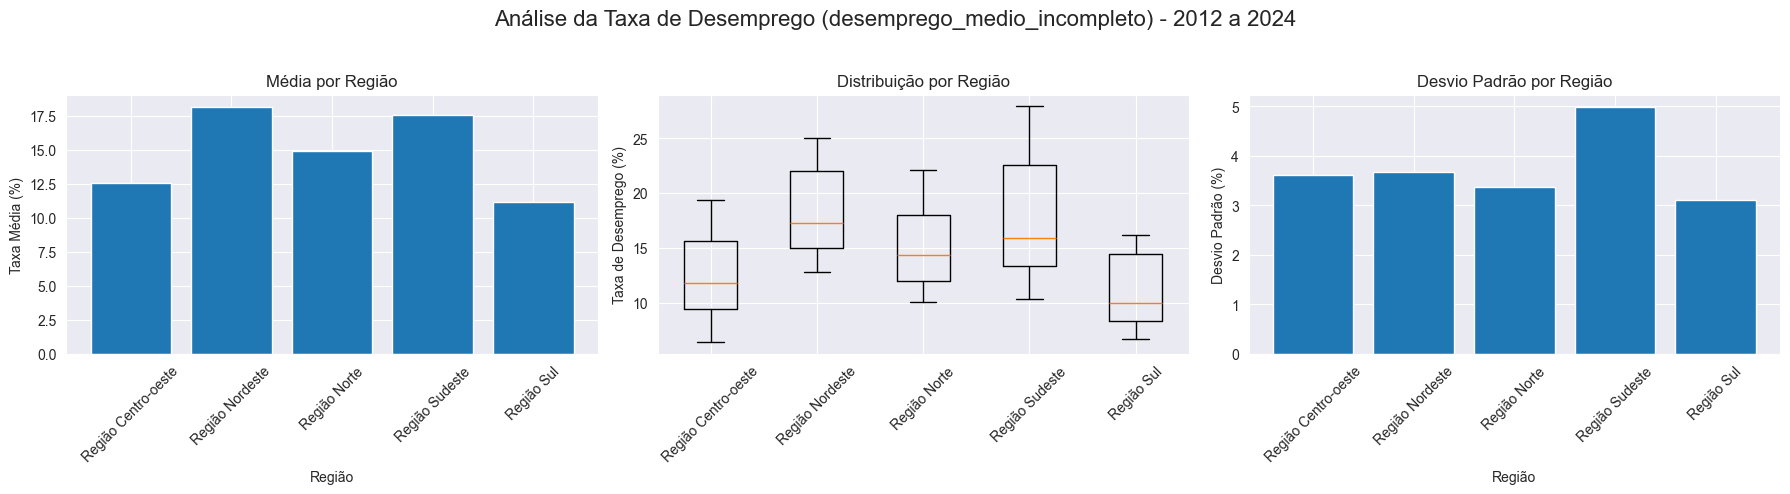


📊 Estatísticas gerais para: desemprego_superior_completo (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,4.600000,4.60,3.7,1.089698,2.7,7.1
1,Região Nordeste,5.843182,5.65,7.0,1.134327,4.1,8.6
2,Região Norte,5.836364,5.20,4.4,1.530632,3.8,9.6
3,Região Sudeste,4.886364,4.50,4.2,1.354165,3.1,7.2
4,Região Sul,3.031818,2.85,2.3,0.743584,2.0,4.5


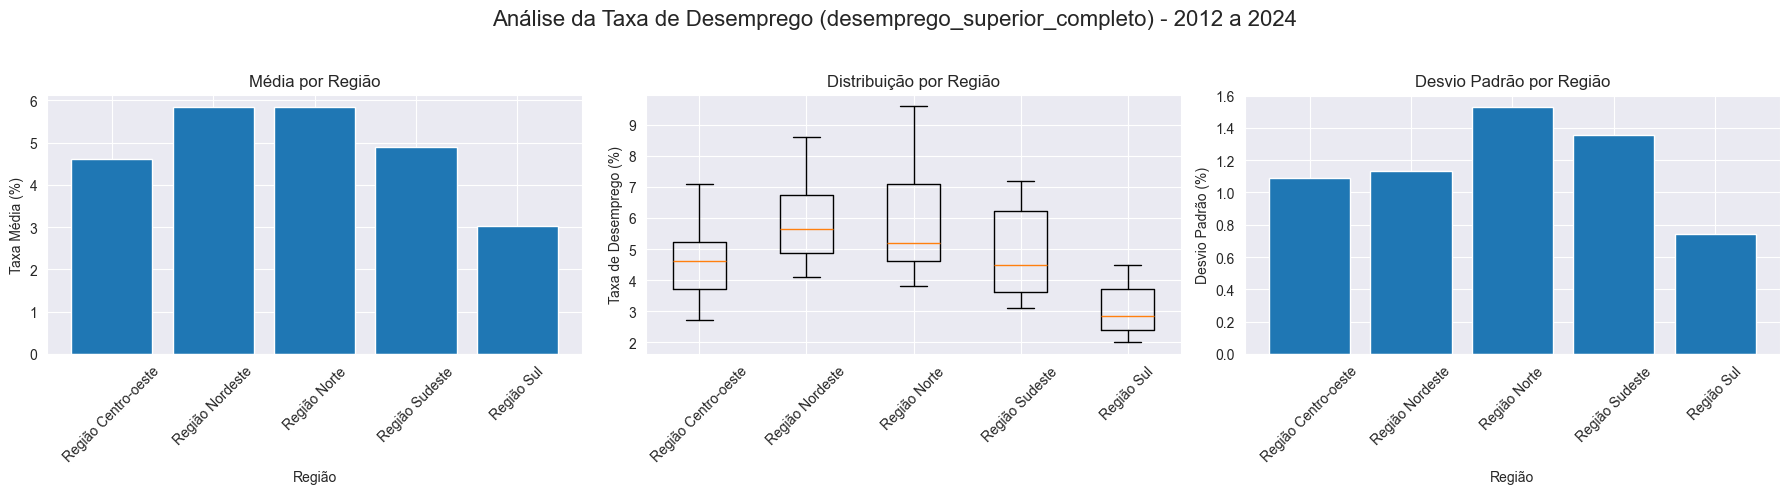


📊 Estatísticas gerais para: desemprego_superior_incompleto (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,9.161364,8.85,6.4,2.515830,5.2,14.5
1,Região Nordeste,12.906818,12.00,11.1,3.063923,8.3,19.1
2,Região Norte,12.552273,12.20,8.3,3.583716,6.9,18.8
3,Região Sudeste,10.527273,9.40,13.4,3.241975,6.7,16.7
4,Região Sul,6.384091,5.80,4.8,1.841251,3.9,9.9


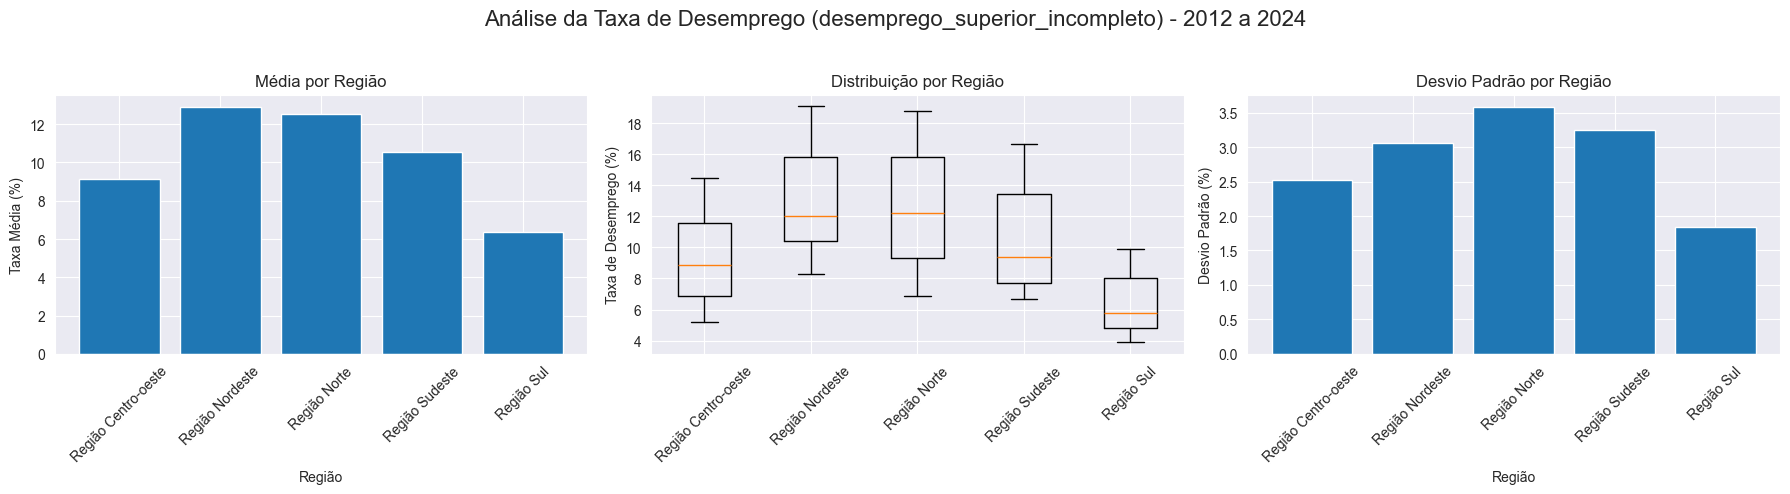


📊 Estatísticas gerais para: desemprego_sem_instrucao (por Região) - De 2012 a 2024



,Região,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo
0,Região Centro-oeste,6.202273,5.20,4.5,2.549828,1.8,11.8
1,Região Nordeste,7.638636,7.45,4.4,2.316695,4.1,11.5
2,Região Norte,4.529545,4.70,5.2,1.513133,1.8,7.3
3,Região Sudeste,7.400000,7.00,5.7,2.692539,3.3,13.0
4,Região Sul,5.663636,5.55,6.3,2.236285,2.2,12.1


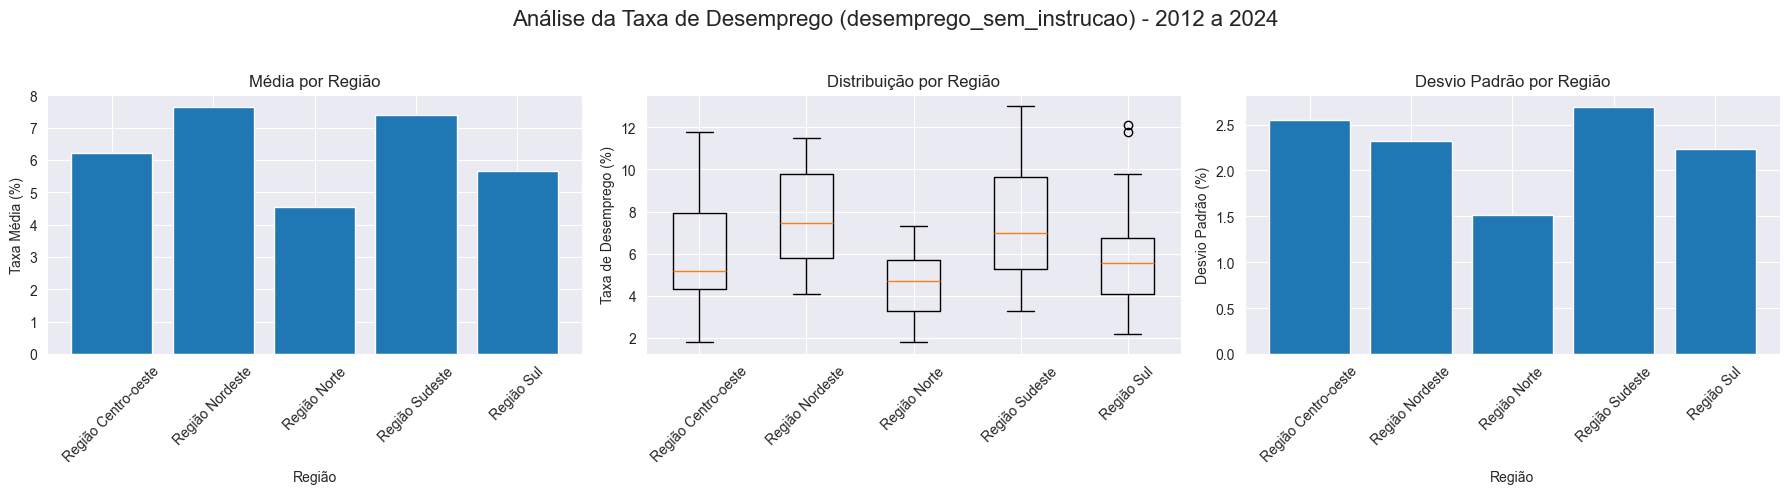

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_estatisticas_gerais_por_regiao(data_frame, chave_data_frame):
    print(f'\n📊 Estatísticas gerais para: {chave_data_frame} (por Região) - De 2012 a 2024\n')

    if 'Região' not in data_frame.columns:
        print('Não existe coluna "Região" nesse DataFrame.\n')
        return None

    resultados = []

    # Selecionar colunas numéricas e excluir a coluna código
    colunas_numericas = data_frame.select_dtypes(include='number').columns
    colunas_numericas = [col for col in colunas_numericas if col != 'Código']

    # Agrupar por Região
    for regiao, grupo in data_frame.groupby('Região'):
        # Pegar todos os valores de todos os trimestres
        valores = grupo[colunas_numericas].values.flatten()

        # Transformar em uma série
        valores = pd.Series(valores).dropna()

        resultados.append({
            'Região': regiao,
            'Média': valores.mean(),
            'Mediana': valores.median(),
            'Moda': valores.mode().values[0] if not valores.mode().empty else None,
            'Desvio Padrão': valores.std(),
            'Mínimo': valores.min(),
            'Máximo': valores.max()
        })

    estatisticas_data_frame = pd.DataFrame(resultados)
    display(estatisticas_data_frame)


def plotar_graficos_regiao(data_frame, chave_data_frame):
    if 'Região' not in data_frame.columns:
        print(f'Sem coluna "Região" para {chave_data_frame}')
        return

    # Selecionar colunas numéricas e excluir coluna código
    colunas_numericas = data_frame.select_dtypes(include='number').columns
    colunas_numericas = [col for col in colunas_numericas if col != 'Código']

    if len(colunas_numericas) == 0:
        print(f'Sem dados numéricos para {chave_data_frame}')
        return

    # Derreter o dataframe
    data_frame_melt = data_frame.melt(id_vars=['Região'], value_vars=colunas_numericas,
                                      var_name='Trimestre', value_name='Valor')

    # Agrupar valores por Região
    grupo_regiao = data_frame_melt.groupby('Região')['Valor']

    medias = grupo_regiao.mean()
    desvios = grupo_regiao.std()
    valores_por_regiao = [grupo.values for _, grupo in grupo_regiao]

    # Criar a grade de subplots: 1 linha, 3 colunas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histograma - Médias por Região
    axes[0].bar(medias.index, medias.values)
    axes[0].set_title('Média por Região')
    axes[0].set_ylabel('Taxa Média (%)')
    axes[0].set_xlabel('Região')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True)

    # 2. Boxplot - Distribuição das taxas
    axes[1].boxplot(valores_por_regiao, tick_labels=grupo_regiao.groups.keys())
    axes[1].set_title('Distribuição por Região')
    axes[1].set_ylabel('Taxa de Desemprego (%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True)

    # 3. Gráfico de barras - Desvio padrão
    axes[2].bar(desvios.index, desvios.values)
    axes[2].set_title('Desvio Padrão por Região')
    axes[2].set_ylabel('Desvio Padrão (%)')
    axes[2].set_xlabel('Região')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True)

    # Título geral para os 3
    fig.suptitle(f'Análise da Taxa de Desemprego ({chave_data_frame}) - 2012 a 2024', fontsize=16)

    plt.tight_layout(rect=(0.0, 0.0, 1.0, 0.95))  # Ajustar para não sobrepor o título
    plt.show()


# Loop para aplicar em todos os DataFrames
for chave, data_frame in conjunto_dados_tratados.items():
    calcular_estatisticas_gerais_por_regiao(data_frame, chave)
    plotar_graficos_regiao(data_frame, chave)


## 🔹 2° Etapa: análise descritiva dos dados
- Apresentação de gráfico com análise da relação entre desempego e escolaridade em cada região do Brasil entre 2012e 2024.

,Região,desemprego_fundamental_completo,desemprego_fundamental_incompleto,desemprego_geral,desemprego_medio_completo,desemprego_medio_incompleto,desemprego_sem_instrucao,desemprego_superior_completo,desemprego_superior_incompleto
0,Região Centro-oeste,9.257778,7.246667,8.143396,7.875556,12.404444,6.175556,4.608889,9.068889
1,Região Nordeste,13.044444,11.026667,12.460377,13.451111,17.795556,7.513333,5.757778,12.664444
2,Região Norte,10.146667,6.853333,9.879245,11.600000,14.620000,4.451111,5.728889,12.295556
3,Região Sudeste,10.844444,8.782222,10.066038,10.484444,17.248889,7.302222,4.844444,10.360000
4,Região Sul,7.455556,5.866667,6.249057,5.915556,10.993333,5.626667,3.053333,6.331111


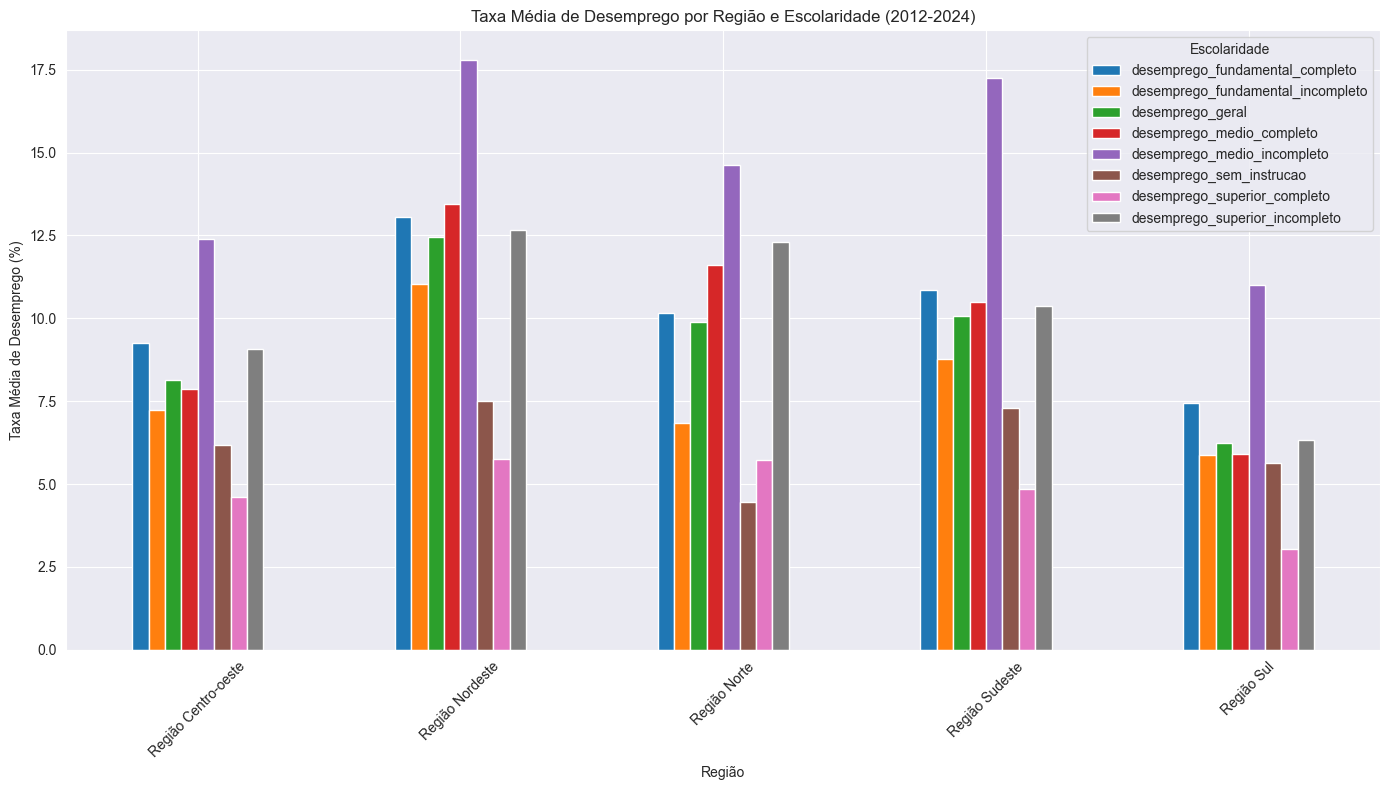

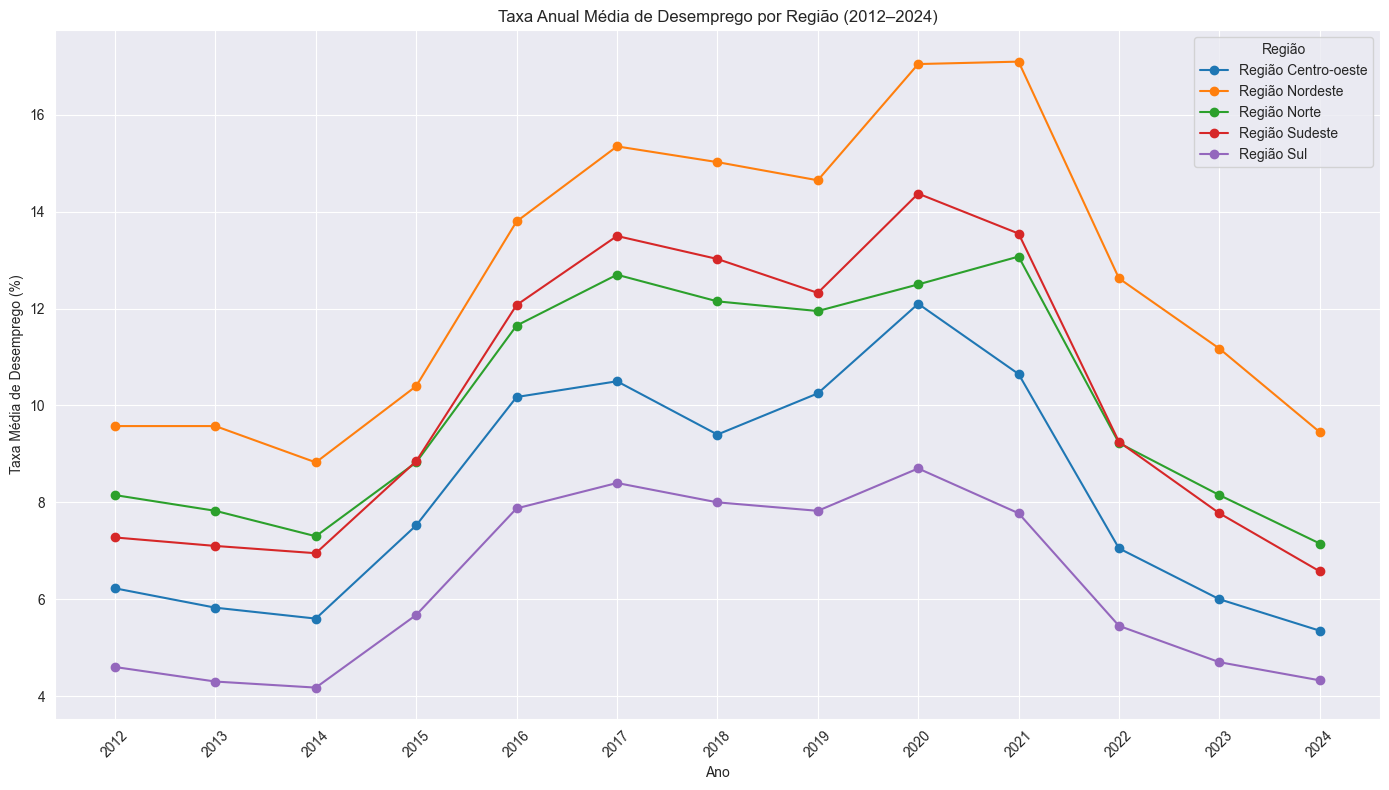

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

def preparar_dados_para_analise_completa_por_regiao(dados):
    lista_data_frame = []

    for escolaridade, data_frame in dados.items():

        # Selecionar colunas numéricas
        colunas_numericas = data_frame.select_dtypes(include='number').columns

        # Derreter o DataFrame
        df_melt = data_frame.melt(id_vars=['Região'], value_vars=colunas_numericas,
                                  var_name='Trimestre', value_name='Taxa de Desemprego')

        # Adicionar coluna de Escolaridade
        df_melt['Escolaridade'] = escolaridade

        lista_data_frame.append(df_melt)

    # Concatenar todos os DataFrames derretidos
    data_frames_concatenados = pd.concat(lista_data_frame, ignore_index=True)

    return data_frames_concatenados

def plotar_grafico_desemprego_escolaridade(data_frames_concatenados):
    # Agrupa e calcula média
    df_agrupado = (
        data_frames_concatenados
        .groupby(['Região', 'Escolaridade'])['Taxa de Desemprego']
        .mean()
        .reset_index()
    )

    # Pivot para wide e ajeita cabeçalhos
    df_wide = df_agrupado.pivot(
        index='Região',
        columns='Escolaridade',
        values='Taxa de Desemprego'
    )
    # faz Região voltar a ser coluna
    df_wide = df_wide.reset_index()
    # remove o nome do eixo das colunas para não emparelhar com 'Região'
    df_wide.columns.name = None

    # Exibe
    display(df_wide)

    # Plotar o gráfico
    df_wide.set_index('Região').plot(
        kind='bar',
        figsize=(14, 8)
    )
    plt.title('Taxa Média de Desemprego por Região e Escolaridade (2012-2024)')
    plt.ylabel('Taxa Média de Desemprego (%)')
    plt.xlabel('Região')
    plt.xticks(rotation=45)
    plt.legend(title='Escolaridade')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plotar_desemprego_anual_regiao(caminho_csv):
    # Identifica e cria o df baseado nos dados do .csv
    df = pd.read_csv(caminho_csv, skiprows=1)
    df = df.loc[:, df.columns.notna()]
    col_quarters = [col for col in df.columns if re.match(r'^\d{4}\sT\d$', col)]

    # Derrete o dataframe
    df_melt = df.melt(
        id_vars=['Região'],
        value_vars=col_quarters,
        var_name='Trimestre',
        value_name='Taxa de Desemprego'
    )
    df_melt['Ano'] = df_melt['Trimestre'].str[:4].astype(int)
    df_melt['Taxa de Desemprego'] = pd.to_numeric(df_melt['Taxa de Desemprego'], errors='coerce')
    df_anual = (
        df_melt
        .groupby(['Região', 'Ano'])['Taxa de Desemprego']
        .mean()
        .reset_index()
    )

    # Plota o gráfico
    plt.figure(figsize=(14, 8))
    for regiao in df_anual['Região'].unique():
        d = df_anual[df_anual['Região'] == regiao]
        plt.plot(d['Ano'], d['Taxa de Desemprego'], marker='o', label=regiao)
    plt.title('Taxa Anual Média de Desemprego por Região (2012–2024)')
    plt.xlabel('Ano')
    plt.ylabel('Taxa Média de Desemprego (%)')
    plt.xticks(sorted(df_anual['Ano'].unique()), rotation=45)
    plt.legend(title='Região')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Preparar os dados
concatenacao_data_frames = preparar_dados_para_analise_completa_por_regiao(conjunto_dados_tratados)

# Plotar o gráfico
plotar_grafico_desemprego_escolaridade(concatenacao_data_frames)

# Plotar o grafico anual
plotar_desemprego_anual_regiao('data/Taxa de desemprego (IBGEPnad Contínua).csv')

## 🔹 3° Etapa: reflexão analítica
- Interpretações baseadas na análise.

A terceira etapa da atividade tem como objetivo apresentar as interpretações obtidas a partir da análise dos dados realizada nas etapas anteriores. Ao observar as estatísticas gerais levantadas na segunda etapa, é possível identificar alguns padrões: indivíduos com ensino superior completo tendem a apresentar as menores taxas de desemprego, seguidos por aqueles com ensino médio completo, e, por fim, pelos grupos com escolaridade incompleta ou sem instrução. Destacam-se picos de desemprego em torno de 2017, associados à crise recessão brasileira de 2015/2016, e de 2020, em decorrência do impacto inicial da pandemia, com uma recuperação gradual observada após 2018 e entre 2022 e 2023.

As regiões Nordeste, Norte e Sudeste, em geral, registram taxas de desemprego superiores à média nacional em praticamente todos os níveis de escolaridade, evidenciando maior vulnerabilidade socioeconômica. Em contrapartida, as regiões Centro-Oeste e Sul se mostram mais protegidas, especialmente entre a população com maior nível de escolaridade.

Uma hipótese que pode ser levantada é a existência de um efeito combinado entre região e escolaridade: em certas regiões, como o Sul e Centro-Oeste, a conclusão do ensino médio já é suficiente para garantir maior resiliência no mercado de trabalho, enquanto nas demais regiões, apenas a conclusão do ensino superior proporciona um amortecimento significativo contra o desemprego.

Uma possível explicação para essa dinâmica é o menor nível de desenvolvimento socioeconômico das regiões Norte, Nordeste e Sudeste, em contraste com o Sul e o Centro-Oeste. Essas disparidades têm raízes em determinantes históricos — como os ciclos econômicos coloniais e pós-coloniais que direcionaram fluxos diferenciados de investimento em infraestrutura — e são agravadas por fatores estruturais contemporâneos, tais como a concentração assimétrica de capital humano e a distribuição desigual de recursos públicos e de crédito (IBGE, 2022).

## 🔹 4 Etapa: Limitações da Análise

Ao interpretar os dados de desemprego por nível de escolaridade e região obtidos nas pesquisas do IBGE, deve-se considerar as seguintes restrições metodológicas e conceituais:


Ao interpretar os dados de desemprego por nível de escolaridade e região obtidos nas pesquisas do IBGE, deve-se considerar as seguintes restrições metodológicas e conceituais:

### Definição restrita de “desempregado”
O IBGE inclui como desocupado apenas quem está sem trabalho, disponível e em procura ativa de emprego, excluindo da taxa oficial indivíduos que desistiram da busca (desalentados) ou que, embora sem emprego, não atendem a todos os critérios de disponibilidade (IBGE, s.d.).

### Omissão de trabalhadores desencorajados
Os desalentados — pessoas que interromperam a procura por descrença na obtenção de vaga — não constam nas estatísticas de desocupação, embora representem contingente significativo da força de trabalho potencial (IBGE, 2019).

### Subestimação do trabalho informal
Todos os que exercem atividade remunerada, formal ou não, são classificados como “ocupados”, mascarando diferenças entre empregos assalariados com carteira e modalidades de trabalho precário (IBGE, 2019).

### Limitações na coleta de dados
Durante a pandemia de Covid-19, a PNAD Contínua adotou coleta telefônica, elevando taxas de não-resposta e introduzindo possível viés de cobertura em domicílios sem acesso confiável a telefone (IBGE, 2021).

### Erros amostrais e precisão regional
Por ser pesquisa amostral, a PNAD Contínua apresenta maior margem de erro em estratos de menor população ou áreas de difícil acesso, o que pode afetar a representatividade de certos grupos e localidades (IBGE, 2021).

### Defasagem temporal entre indicadores
Enquanto o nível de escolaridade é reportado anualmente, a taxa de desemprego é divulgada mensal ou trimestralmente, gerando possíveis inconsistências ao relacionar mudanças recentes na escolarização com variações de emprego (IBGE, s.d.).

### Cobertura geográfica restrita
A PNAD Contínua engloba domicílios urbanos e rurais, mas exclui coletivos como prisões, acampamentos e aldeias indígenas isoladas, sub-representando certas populações (IBGE, s.d.).

### Granularidade limitada por região
Disponibilização oficial apenas por Grandes Regiões, Unidades da Federação e regiões metropolitanas impede análises mais detalhadas em nível de microrregiões ou distritos (IBGE, s.d.).

### Classificação de formas de trabalho atípicas
Modalidades como voluntariado, trabalho para o próprio consumo ou afazeres domésticos não remunerados não são contabilizadas, embora possam influenciar a disponibilidade real para o mercado de trabalho (IBGE, s.d.).

### Omissão de pessoas com deficiência
As estatísticas gerais não contemplam especificamente a situação de pessoas com deficiência, cuja taxa de desocupação e informalidade é sistematicamente maior em comparação ao restante da população (IBGE, 2022).

---

## Referências

- IBGE. *Explica desem­prego*. Disponível em: <https://www.ibge.gov.br/explica/desemprego.php>. Acesso em: 28 abr. 2025.
- IBGE. *Desemprego fica estável, mas população subutilizada é a maior desde 2012*. Agência de Notícias IBGE, 28 jun. 2019. Disponível em: <https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/24909-desemprego-fica-estavel-mas-populacao-subutilizada-e-a-maior-desde-2012>. Acesso em: 28 abr. 2025.
- IBGE. *Desemprego e informalidade são maiores entre as pessoas com deficiência*. Agência de Notícias IBGE, 21 set. 2022. Disponível em: <https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/34977-desemprego-e-informalidade-sao-maiores-entre-as-pessoas-com-deficiencia>. Acesso em: 28 abr. 2025.
- IBGE. *Pesquisa Nacional por Amostra de Domicílios Contínua – Divulgação trimestral*. IBGE, 30 nov. 2021. Disponível em: <https://www.ibge.gov.br/estatisticas/sociais/saude/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html>. Acesso em: 28 abr. 2025.